In [1]:
import pandas as pd

# Load the dataset
url = "https://raw.githubusercontent.com/Rising-Stars-by-Sunshine/Yian_STATS201/main/Data/dataset.csv"
df = pd.read_csv(url)

df.rename(columns = {'Nacionality':'Nationality'}, inplace = True)

In [2]:
# We will be deleting the "Enrolled" within the data since we are analyzing academic success/dropout

df = df[df['Target'] != 'Enrolled'].reset_index(drop=True)


In [3]:
# This visualizes the necessary columns within the dataset.
from pyecharts import options as opts
from pyecharts.charts import Bar, Tab
from pyecharts.globals import ThemeType

def plot_value_counts(df, columns_to_plot):
    
    tab = Tab()

    for column in columns_to_plot:
        if column in df.columns:
            counts = df[column].value_counts()
            bar = (
                Bar(init_opts=opts.InitOpts(theme=ThemeType.CHALK))
                .add_xaxis(counts.index.tolist())
                .add_yaxis("Frequency", counts.values.tolist())
                .set_global_opts(title_opts=opts.TitleOpts(title=f"{column}"))
            )
            tab.add(bar, f"{column}")

    return tab.render_notebook()

columns_to_plot = ["Marital status","Application mode","Application order","Course","Daytime/evening attendance","Previous qualification","Nationality","Mother's qualification","Father's qualification","Mother's occupation","Father's occupation","Displaced","Educational special needs","Debtor","Tuition fees up to date","Gender","Scholarship holder","Age at enrollment","International","Target"]
plot_value_counts(df, columns_to_plot)

In [4]:
# 0 represents "Dropout" and 1 represents "Graduate"
df['Target'] = df['Target'].map({'Dropout': 0, 'Graduate': 1})

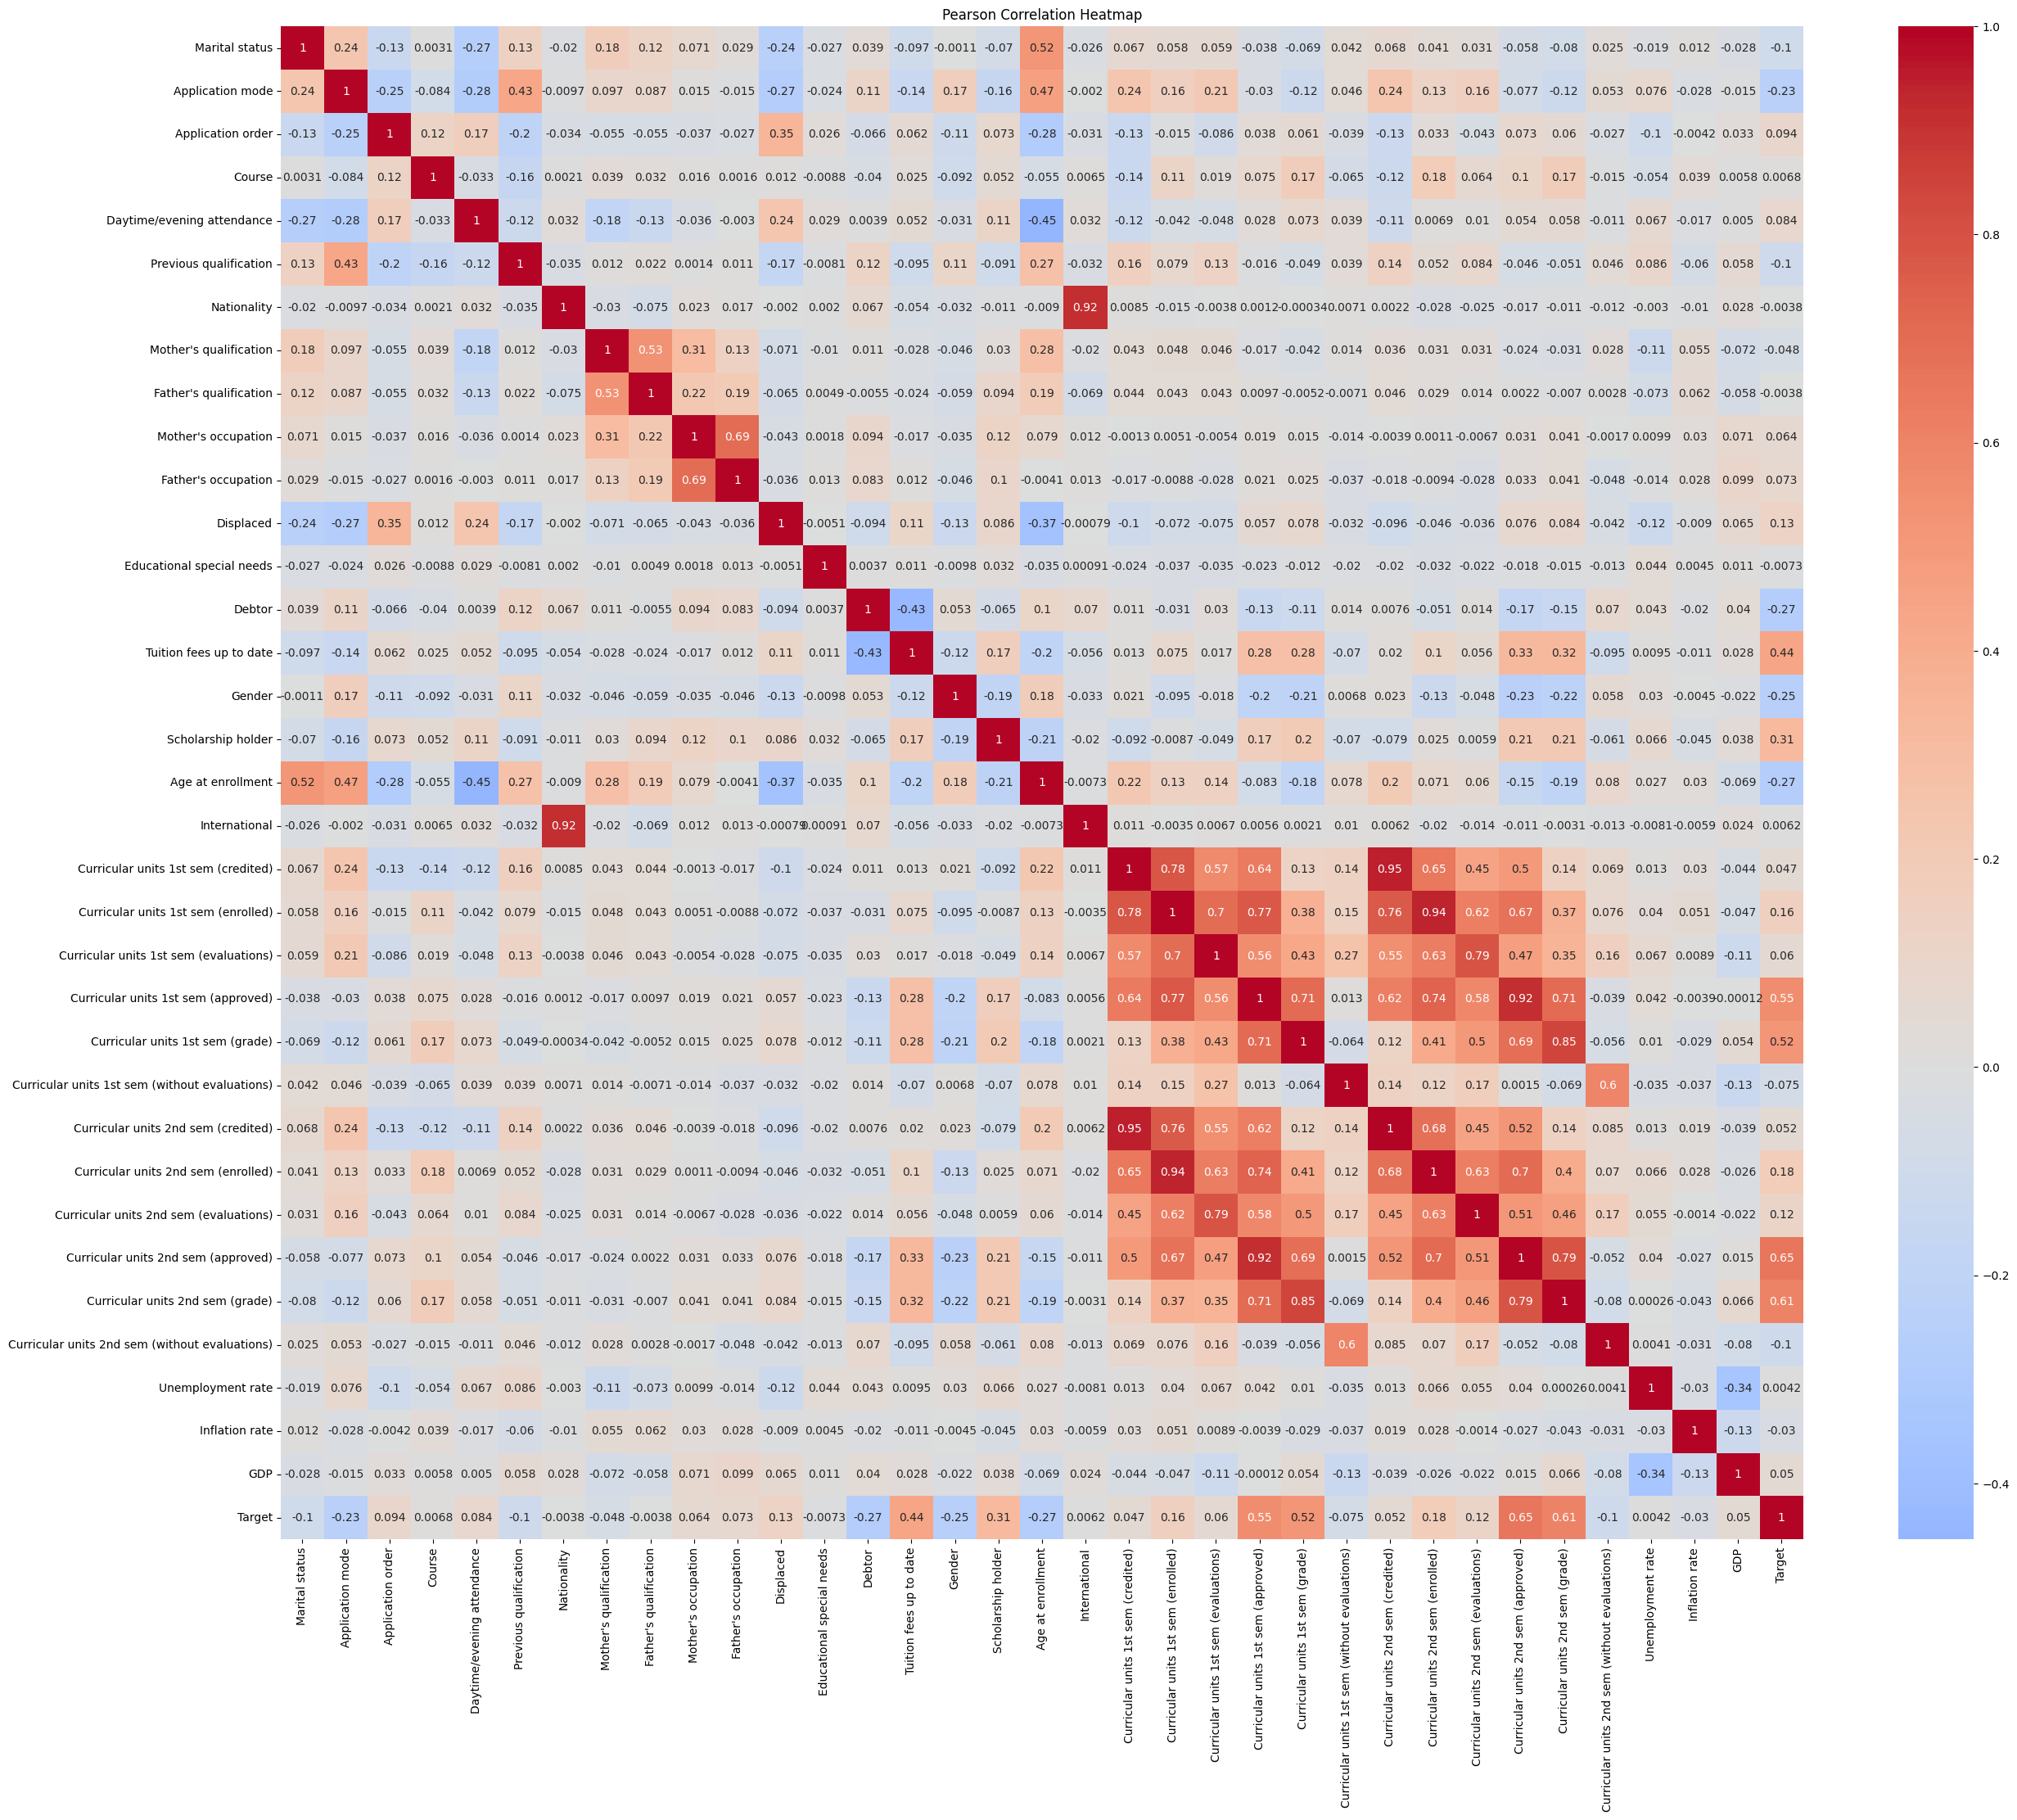

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
corr_matrix = df.corr()
plt.figure(figsize=(30, 24)) 

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0) 
plt.title('Pearson Correlation Heatmap')

plt.show()

In [6]:
# Delete Nationality
df.drop(columns=['Nationality'], inplace=True)

In [7]:
# Rank qualification

qualification_mapping = {
    1: "Secondary education",
    2: "Higher education—bachelor's degree",
    3: "Higher education—degree",
    4: "Higher education—master's degree",
    5: "Higher education—doctorate",
    6: "Frequency of higher education",
    7: "12th year of schooling—not completed",
    8: "11th year of schooling—not completed",
    9: "Other—11th year of schooling",
    10: "10th year of schooling",
    11: "10th year of schooling—not completed",
    12: "Basic education 3rd cycle (9th/10th/11th year) or equivalent",
    13: "Basic education 2nd cycle (6th/7th/8th year) or equivalent",
    14: "Technological specialization course",
    15: "Higher education—degree (1st cycle)",
    16: "Professional higher technical course",
    17: "Higher education—master's degree (2nd cycle)"
}

df['Previous qualification'] = df['Previous qualification'].map(qualification_mapping)



In [8]:
qualification_mapping_new_ranking = {
    "10th year of schooling—not completed": 1,
    "10th year of schooling": 2,
    "11th year of schooling—not completed": 3,
    "Other—11th year of schooling": 4,
    "12th year of schooling—not completed": 5,
    "Basic education 2nd cycle (6th/7th/8th year) or equivalent": 6,
    "Basic education 3rd cycle (9th/10th/11th year) or equivalent": 7,
    "Technological specialization course": 8,
    "Secondary education": 9,
    "Frequency of higher education": 10,
    "Higher education—degree (1st cycle)": 11,
    "Higher education—bachelor's degree": 12,
    "Professional higher technical course": 13,
    "Higher education—degree": 14,
    "Higher education—master's degree": 15,
    "Higher education—master's degree (2nd cycle)": 16,
    "Higher education—doctorate": 17
}

df['Previous qualification'] = df['Previous qualification'].map(qualification_mapping_new_ranking)

In [9]:
parent_qualification_mapping = {
    1: "Secondary Education—12th Year of Schooling or Equivalent",
    2: "Higher Education—bachelor's degree",
    3: "Higher Education—degree",
    4: "Higher Education—master's degree",
    5: "Higher Education—doctorate",
    6: "Frequency of Higher Education",
    7: "12th Year of Schooling—not completed",
    8: "11th Year of Schooling—not completed",
    9: "7th Year (Old)",
    10: "Other—11th Year of Schooling",
    11: "2nd year complementary high school course",
    12: "10th Year of Schooling",
    13: "General commerce course",
    14: "Basic Education 3rd Cycle (9th/10th/11th Year) or Equivalent",
    15: "Complementary High School Course",
    16: "Technical-professional course",
    17: "Complementary High School Course—not concluded",
    18: "7th year of schooling",
    19: "2nd cycle of the general high school course",
    20: "9th Year of Schooling—not completed",
    21: "8th year of schooling",
    22: "General Course of Administration and Commerce",
    23: "Supplementary Accounting and Administration",
    24: "Unknown",
    25: "Cannot read or write",
    26: "Can read without having a 4th year of schooling",
    27: "Basic education 1st cycle (4th/5th year) or equivalent",
    28: "Basic Education 2nd Cycle (6th/7th/8th Year) or equivalent",
    29: "Technological specialization course",
    30: "Higher education—degree (1st cycle)",
    31: "Specialized higher studies course",
    32: "Professional higher technical course",
    33: "Higher Education—master's degree (2nd cycle)",
    34: "Higher Education—doctorate (3rd cycle)"
}


In [10]:
df["Mother's qualification"] = df["Mother's qualification"].map(parent_qualification_mapping)

In [11]:
df["Father's qualification"] = df["Father's qualification"].map(parent_qualification_mapping)

In [12]:
parent_qualification_mapping_new_ranking = {
    "Secondary Education—12th Year of Schooling or Equivalent": 6,
    "Higher Education—bachelor's degree": 7,
    "Higher Education—degree": 7,
    "Higher Education—master's degree": 8,
    "Higher Education—doctorate": 9,
    "Frequency of Higher Education": 7,
    "12th Year of Schooling—not completed": 5,
    "11th Year of Schooling—not completed": 5,
    "7th Year (Old)": 4,
    "Other—11th Year of Schooling": 5,
    "2nd year complementary high school course": 6,
    "10th Year of Schooling": 5,
    "General commerce course": 7,
    "Basic Education 3rd Cycle (9th/10th/11th Year) or Equivalent": 5,
    "Complementary High School Course": 6,
    "Technical-professional course": 7,
    "Complementary High School Course—not concluded": 6,
    "7th year of schooling": 4,
    "2nd cycle of the general high school course": 6,
    "9th Year of Schooling—not completed": 4,
    "8th year of schooling": 4,
    "General Course of Administration and Commerce": 7,
    "Supplementary Accounting and Administration": 7,
    "Unknown": 0,
    "Cannot read or write": 1,
    "Can read without having a 4th year of schooling": 2,
    "Basic education 1st cycle (4th/5th year) or equivalent": 3,
    "Basic Education 2nd Cycle (6th/7th/8th Year) or equivalent": 4,
    "Technological specialization course": 7,
    "Higher education—degree (1st cycle)": 7,
    "Specialized higher studies course": 7,
    "Professional higher technical course": 8,
    "Higher Education—master's degree (2nd cycle)": 8,
    "Higher Education—doctorate (3rd cycle)": 9
}



In [13]:
df["Mother's qualification"] = df["Mother's qualification"].map(parent_qualification_mapping_new_ranking)

In [14]:
df["Father's qualification"] = df["Father's qualification"].map(parent_qualification_mapping_new_ranking)

In [15]:
# Categorize occupations
# A High-Level Professional and Management Roles
# B Intermediate-Level Technical and Administrative Roles
# C Service and Support Roles
# D Unskilled/Labor
# E Student
categorize = {
    1: "E",  # Student
    2: "A",  # Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers
    3: "A",  # Specialists in Intellectual and Scientific Activities
    4: "B",  # Intermediate Level Technicians and Professions
    5: "C",  # Administrative staff
    6: "C",  # Personal Services, Security and Safety Workers, and Sellers
    7: "D",  # Farmers and Skilled Workers in Agriculture, Fisheries, and Forestry
    8: "D",  # Skilled Workers in Industry, Construction, and Craftsmen
    9: "D",  # Installation and Machine Operators and Assembly Workers
    10: "D",  # Unskilled Workers
    11: "A",  # Armed Forces Professions
    12: "D",  # Other Situation
    13: "D",  # (blank)
    14: "A",  # Armed Forces Officers
    15: "A",  # Armed Forces Sergeants
    16: "A",  # Other Armed Forces personnel
    17: "A",  # Directors of administrative and commercial services
    18: "A",  # Hotel, catering, trade, and other services directors
    19: "A",  # Specialists in the physical sciences, mathematics, engineering, and related techniques
    20: "A",  # Health professionals
    21: "A",  # Teachers
    22: "A",  # Specialists in finance, accounting, administrative organization, and public and commercial relations
    23: "B",  # Intermediate level science and engineering technicians and professions
    24: "B",  # Technicians and professionals of intermediate level of health
    25: "B",  # Intermediate level technicians from legal, social, sports, cultural, and similar services
    26: "B",  # Information and communication technology technicians
    27: "B",  # Office workers, secretaries in general, and data processing operators
    28: "B",  # Data, accounting, statistical, financial services, and registry-related operators
    29: "B",  # Other administrative support staff
    30: "C",  # Personal service workers
    31: "C",  # Sellers
    32: "C",  # Personal care workers and the like
    33: "C",  # Protection and security services personnel
    34: "D",  # Market-oriented farmers and skilled agricultural and animal production workers
    35: "D",  # Farmers, livestock keepers, fishermen, hunters and gatherers, and subsistence
    36: "D",  # Skilled construction workers and the like, except electricians
    37: "D",  # Skilled workers in metallurgy, metalworking, and similar
    38: "D",  # Skilled workers in electricity and electronics
    39: "D",  # Workers in food processing, woodworking, and clothing and other industries and crafts
    40: "D",  # Fixed plant and machine operators
    41: "D",  # Assembly workers
    42: "D",  # Vehicle drivers and mobile equipment operators
    43: "D",  # Unskilled workers in agriculture, animal production, and fisheries and forestry
    44: "D",  # Unskilled workers in extractive industry, construction, manufacturing, and transport
    45: "C",  # Meal preparation assistants
    46: "C"   # Street vendors (except food) and street service providers
}
categorize_rank = {
    "A": 5,
    "B": 4,
    "C": 3,
    "D": 2,
    "E": 1
}

In [16]:
df["Mother's occupation"] = df["Mother's occupation"].map(categorize)

In [17]:
df["Father's occupation"] = df["Father's occupation"].map(categorize)

In [18]:
df["Mother's occupation"] = df["Mother's occupation"].map(categorize_rank)

In [19]:
df["Father's occupation"] = df["Father's occupation"].map(categorize_rank)

In [20]:
# We want to focus less on student's academic performance.
columns_to_delete = [col for col in df.columns if col.startswith('Curricular units')]
df = df.drop(columns=columns_to_delete)

In [21]:
# First four columns Onehot Encoder
categorical_columns = ['Marital status', 'Application mode', 'Application order', 'Course']

encoded_df = pd.DataFrame()

for col in categorical_columns:
    encoded_col = pd.get_dummies(df[col], prefix=col, dtype=int)
    encoded_df = pd.concat([encoded_df, encoded_col], axis=1)

Df = pd.concat([df.drop(columns=categorical_columns), encoded_df], axis=1)

In [22]:
# Assuming your final encoded dataframe is df_encoded
# Df.to_csv('encoded_data.csv', index=False)

In [23]:
columns_to_drop = "Target"

X = Df.drop([columns_to_drop], axis=1)

y = Df[["Target"]].squeeze()

In [24]:
# Check for NaN values
nan_columns = X.columns[X.isnull().any()].tolist()

if nan_columns:
    print("NaN values are present in the following columns:")
    for col in nan_columns:
        nan_count = X[col].isnull().sum()
        print(f"Column '{col}' has {nan_count} NaN value(s).")
else:
    print("No NaN values are present in any column.")

No NaN values are present in any column.


In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [26]:
import xgboost as xgb

model = xgb.XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

Train Accuracy: 0.9607438016528925
Test Accuracy: 0.7878787878787878
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.68      0.70       271
           1       0.82      0.85      0.83       455

    accuracy                           0.79       726
   macro avg       0.78      0.77      0.77       726
weighted avg       0.79      0.79      0.79       726

Confusion Matrix:
[[183  88]
 [ 66 389]]


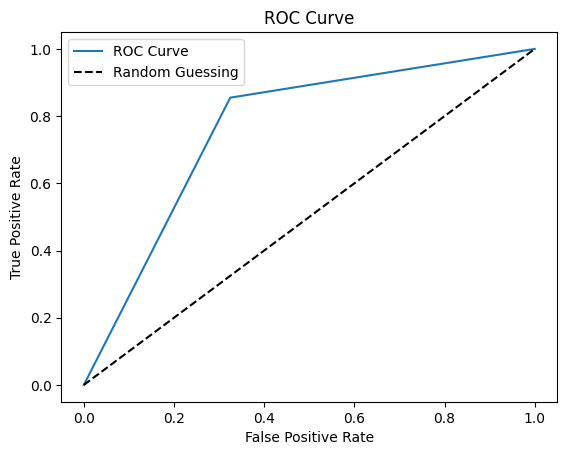

In [27]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve

# Predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Accuracy
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred_test))

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


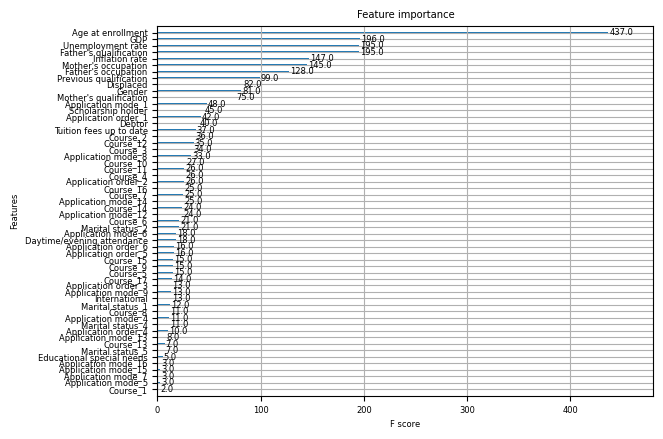

In [28]:
import matplotlib.pyplot as plt

plt.rcParams['font.size'] = 6
xgb.plot_importance(model)
plt.show()

In [29]:
import statsmodels.api as sm

# Fit an OLS regression model
X_train_ols = sm.add_constant(X_train)  # Add a constant term to the predictor variables
ols_model = sm.OLS(y_train, X_train_ols)
ols_results = ols_model.fit()

# Print OLS regression results
print("OLS Regression Results:")
print(ols_results.summary())


OLS Regression Results:
                            OLS Regression Results                            
Dep. Variable:                 Target   R-squared:                       0.381
Model:                            OLS   Adj. R-squared:                  0.368
Method:                 Least Squares   F-statistic:                     29.17
Date:                Sat, 17 Feb 2024   Prob (F-statistic):          2.06e-248
Time:                        22:44:12   Log-Likelihood:                -1346.9
No. Observations:                2904   AIC:                             2816.
Df Residuals:                    2843   BIC:                             3180.
Df Model:                          60                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------

In [30]:
from sklearn.ensemble import RandomForestClassifier 
rfc = RandomForestClassifier(n_estimators=50, max_depth=5, max_features='sqrt', random_state=0) 
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=50, random_state=0)

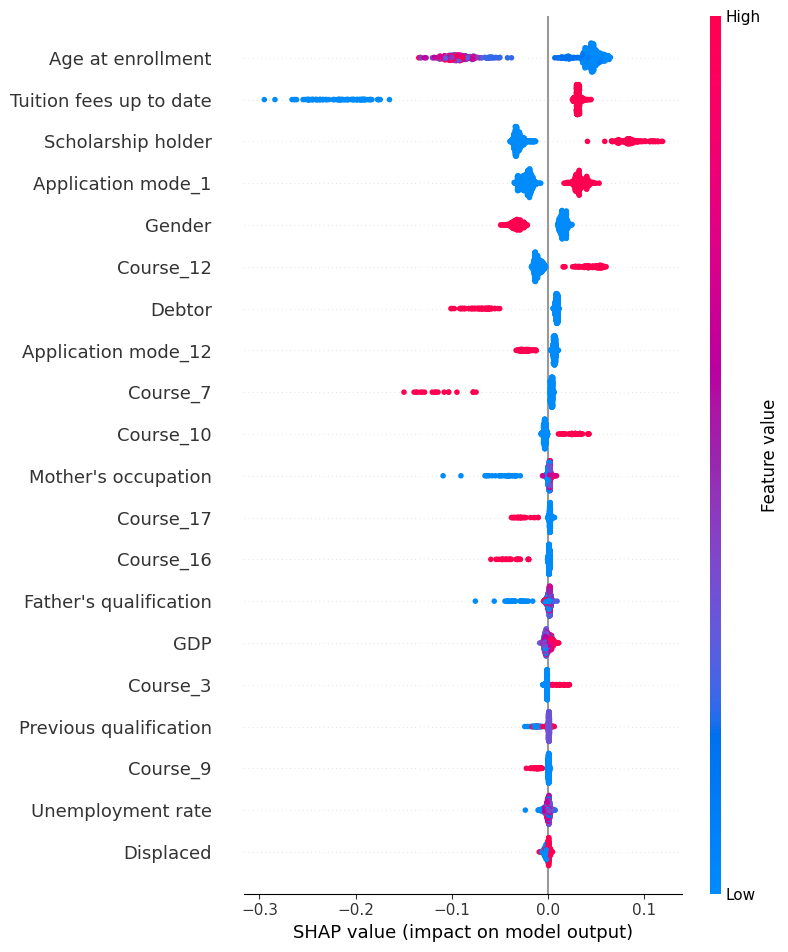

In [31]:
import shap  

explainer = shap.TreeExplainer(rfc)

shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values[1], X_test)